In [3]:
#Import Required library
import pandas as pd
!pip install graphviz
!pip install pydotplus
import pydotplus
import graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import TransformerMixin
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
# Import the data
loan=pd.read_csv("PL_XSELL.csv")

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 40 columns):
CUST_ID                     20000 non-null object
TARGET                      20000 non-null int64
AGE                         20000 non-null int64
GENDER                      20000 non-null object
BALANCE                     20000 non-null float64
OCCUPATION                  20000 non-null object
AGE_BKT                     20000 non-null object
SCR                         20000 non-null int64
HOLDING_PERIOD              20000 non-null int64
ACC_TYPE                    20000 non-null object
ACC_OP_DATE                 20000 non-null object
LEN_OF_RLTN_IN_MNTH         20000 non-null int64
NO_OF_L_CR_TXNS             20000 non-null int64
NO_OF_L_DR_TXNS             20000 non-null int64
TOT_NO_OF_L_TXNS            20000 non-null int64
NO_OF_BR_CSH_WDL_DR_TXNS    20000 non-null int64
NO_OF_ATM_DR_TXNS           20000 non-null int64
NO_OF_NET_DR_TXNS           20000 non-null int64
N

In [5]:
df=loan[loan.dtypes[(loan.dtypes=="float64")|(loan.dtypes=="int64")].index.values]
df['TARGET']=loan['TARGET']
df

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TARGET,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,...,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random
0,0,27,3383.75,776,30,146,7,3,10,0,...,0,0,13100.00,0.00,0.00,486778.50,0.0,1,1,0.000011
1,0,47,287489.04,324,28,104,8,2,10,0,...,0,0,6600.00,0.00,0.00,799813.00,0.0,1,0,0.000111
2,0,40,18216.88,603,2,61,10,5,15,1,...,0,1,11200.00,561120.00,24660.00,997570.00,0.0,1,1,0.000120
3,0,53,71720.48,196,13,107,36,14,50,4,...,0,0,13050.00,168397.50,15195.00,247168.67,71388.0,1,0,0.000137
4,0,36,1671622.89,167,24,185,20,1,21,1,...,0,0,0.00,808480.00,0.00,0.00,0.0,1,0,0.000174
5,0,42,521685.69,493,26,192,5,2,7,1,...,0,0,18500.00,379310.00,0.00,0.00,0.0,1,1,0.000406
6,0,30,204458.60,479,14,177,6,6,12,0,...,0,0,6200.00,0.00,2645.00,770065.00,0.0,0,1,0.000499
7,0,53,58516.34,562,25,99,14,3,17,3,...,0,0,0.00,315053.33,0.00,0.00,0.0,1,1,0.000502
8,0,42,13158.14,105,15,88,18,14,32,6,...,0,0,17700.00,33071.67,51490.00,81605.25,170332.0,1,1,0.000523
9,0,30,831150.18,170,13,111,14,8,22,3,...,0,0,18000.00,289960.00,8152.50,0.00,0.0,0,0,0.000571


In [7]:
# get a list of all columns in the dataframe without the Group column
column_list = [x for x in df.columns if x != 'TARGET']
# create an empty dictionary
t_test_results = {}
# loop over column_list and execute code explained above
for column in column_list:
    group1 = df.where(df.TARGET== 1).dropna()[column]
    group2 = df.where(df.TARGET== 0).dropna()[column]
    # add the output to the dictionary 
    t_test_results[column] = stats.ttest_ind(group1,group2)
results_df = pd.DataFrame.from_dict(t_test_results,orient='Index')
results_df.columns = ['statistic','pvalue']
results_df

,statistic,pvalue
AGE,3.250148,1.155356e-03
BALANCE,-9.504895,2.221910e-21
SCR,11.193771,5.335084e-29
HOLDING_PERIOD,-19.332224,1.629451e-82
LEN_OF_RLTN_IN_MNTH,-3.340813,8.368631e-04
NO_OF_L_CR_TXNS,17.134229,2.413810e-65
NO_OF_L_DR_TXNS,17.520405,3.237312e-68
TOT_NO_OF_L_TXNS,19.195228,2.189287e-81
NO_OF_BR_CSH_WDL_DR_TXNS,14.486801,2.549900e-47
NO_OF_ATM_DR_TXNS,11.686399,1.893220e-31


### On high level, we can do significance test and check if we can remove any variable. Here all the p value is significant

In [4]:
loan=loan[['TARGET','BALANCE','OCCUPATION','SCR','HOLDING_PERIOD','LEN_OF_RLTN_IN_MNTH',
           'FLG_HAS_CC','AMT_L_DR','AMT_MIN_BAL_NMC_CHGS','NO_OF_IW_CHQ_BNC_TXNS',
           'FLG_HAS_NOMINEE','FLG_HAS_OLD_LOAN','AGE','NO_OF_L_CR_TXNS','NO_OF_L_DR_TXNS']].copy()

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
loan.head(5)

,TARGET,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,FLG_HAS_CC,AMT_L_DR,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,AGE,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS
0,0,3383.75,SELF-EMP,776,30,146,0,986657.0,0,0,1,1,27,7,3
1,0,287489.04,SAL,324,28,104,0,806413.0,0,0,1,0,47,8,2
2,0,18216.88,SELF-EMP,603,2,61,0,1619210.0,0,0,1,1,40,10,5
3,0,71720.48,SAL,196,13,107,0,1573364.0,0,0,1,0,53,36,14
4,0,1671622.89,PROF,167,24,185,0,808480.0,0,0,1,0,36,20,1


In [6]:
# shifting target at last
df1 =loan.pop('TARGET')
loan['TARGET']=df1
loan.dtypes

BALANCE                  float64
OCCUPATION                object
SCR                        int64
HOLDING_PERIOD             int64
LEN_OF_RLTN_IN_MNTH        int64
FLG_HAS_CC                 int64
AMT_L_DR                 float64
AMT_MIN_BAL_NMC_CHGS       int64
NO_OF_IW_CHQ_BNC_TXNS      int64
FLG_HAS_NOMINEE            int64
FLG_HAS_OLD_LOAN           int64
AGE                        int64
NO_OF_L_CR_TXNS            int64
NO_OF_L_DR_TXNS            int64
TARGET                     int64
dtype: object

In [7]:
#Summary of continuos or numerical variables
loan.describe()

,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,FLG_HAS_CC,AMT_L_DR,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,AGE,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TARGET
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,5.113622e+05,440.150300,14.955650,125.239300,0.305400,7.737170e+05,1.292000,0.042750,0.901150,0.492950,38.418150,12.348050,6.63370,0.125600
std,7.235930e+05,249.887582,8.642634,54.953936,0.460588,7.126592e+05,14.764201,0.203038,0.298468,0.499963,9.577985,12.151921,7.67583,0.331406
min,0.000000e+00,100.000000,1.000000,29.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.00000,0.000000
25%,6.475403e+04,227.000000,7.000000,79.000000,0.000000,2.379355e+05,0.000000,0.000000,1.000000,0.000000,30.000000,6.000000,2.00000,0.000000
50%,2.316758e+05,364.000000,15.000000,125.000000,0.000000,6.951150e+05,0.000000,0.000000,1.000000,0.000000,38.000000,10.000000,5.00000,0.000000
75%,6.538768e+05,644.000000,22.000000,172.000000,1.000000,1.078927e+06,0.000000,0.000000,1.000000,1.000000,46.000000,14.000000,7.00000,0.000000
max,8.360431e+06,999.000000,31.000000,221.000000,1.000000,6.514921e+06,170.000000,2.000000,1.000000,1.000000,55.000000,75.000000,74.00000,1.000000


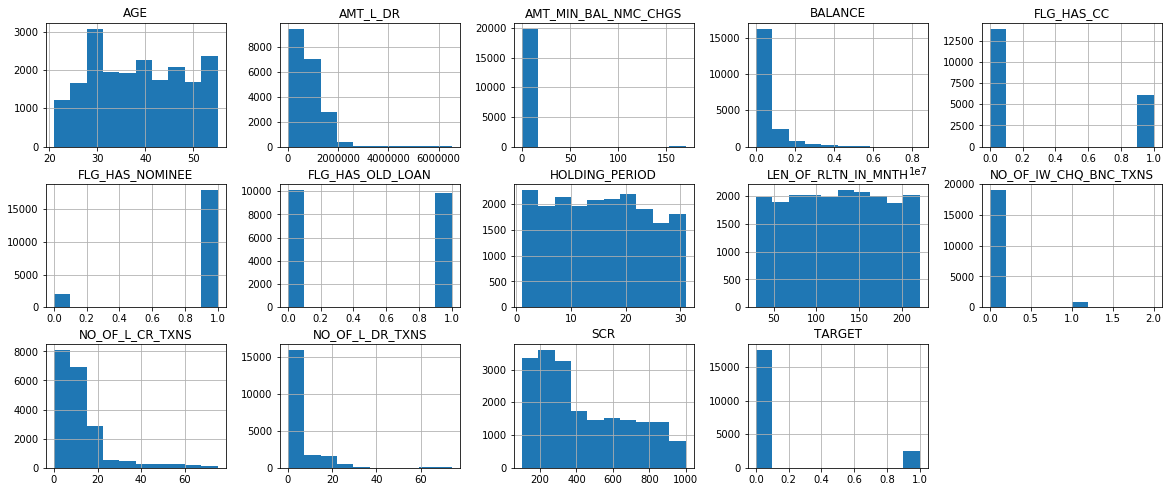

In [8]:
loan_hist=loan[loan.dtypes[(loan.dtypes=="float64")|(loan.dtypes=="int64")]
               .index.values].hist(figsize=[20,20],layout=(7,5))

### we can see the insights from each variablity. Seems No_of_-L_CR_TXNS is spread out and it can be a important factor. Similarly Flg_HAS_OLD_LOAN is equally spread, so it can be not an important factor. Check variability

In [9]:
loan['OCCUPATION'].value_counts()

SAL         5855
PROF        5417
SENP        5160
SELF-EMP    3568
Name: OCCUPATION, dtype: int64

In [10]:
df=loan[loan.dtypes[(loan.dtypes=="float64")|(loan.dtypes=="int64")].index.values]

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 5))

Top Absolute Correlations
NO_OF_L_CR_TXNS  NO_OF_L_DR_TXNS    0.582878
AMT_L_DR         NO_OF_L_DR_TXNS    0.530682
HOLDING_PERIOD   NO_OF_L_DR_TXNS    0.347855
AMT_L_DR         NO_OF_L_CR_TXNS    0.320615
HOLDING_PERIOD   AMT_L_DR           0.228821
dtype: float64


### NO_OF_L_CR_TXNS & NO_OF_L_DR_TXNS is having Correlation with lots of variables, so both might be an good factor for CART Model

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
BALANCE                  20000 non-null float64
OCCUPATION               20000 non-null object
SCR                      20000 non-null int64
HOLDING_PERIOD           20000 non-null int64
LEN_OF_RLTN_IN_MNTH      20000 non-null int64
FLG_HAS_CC               20000 non-null int64
AMT_L_DR                 20000 non-null float64
AMT_MIN_BAL_NMC_CHGS     20000 non-null int64
NO_OF_IW_CHQ_BNC_TXNS    20000 non-null int64
FLG_HAS_NOMINEE          20000 non-null int64
FLG_HAS_OLD_LOAN         20000 non-null int64
AGE                      20000 non-null int64
NO_OF_L_CR_TXNS          20000 non-null int64
NO_OF_L_DR_TXNS          20000 non-null int64
TARGET                   20000 non-null int64
dtypes: float64(2), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
loan_df = pd.get_dummies( loan, drop_first = True )
loan_df.head(2)

,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,FLG_HAS_CC,AMT_L_DR,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,AGE,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TARGET,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP
0,3383.75,776,30,146,0,986657.0,0,0,1,1,27,7,3,0,0,1,0
1,287489.04,324,28,104,0,806413.0,0,0,1,0,47,8,2,0,1,0,0


In [13]:
loan_df.columns

Index(['BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'FLG_HAS_CC',
       'AMT_L_DR', 'AMT_MIN_BAL_NMC_CHGS', 'NO_OF_IW_CHQ_BNC_TXNS',
       'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN', 'AGE', 'NO_OF_L_CR_TXNS',
       'NO_OF_L_DR_TXNS', 'TARGET', 'OCCUPATION_SAL', 'OCCUPATION_SELF-EMP',
       'OCCUPATION_SENP'],
      dtype='object')

In [14]:
#Splitting Dataset into Train and Test
from sklearn.model_selection import train_test_split


feature_cols = ['BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'FLG_HAS_CC',
       'AMT_L_DR', 'AMT_MIN_BAL_NMC_CHGS', 'NO_OF_IW_CHQ_BNC_TXNS',
       'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN', 'AGE', 'NO_OF_L_CR_TXNS',
       'NO_OF_L_DR_TXNS', 'OCCUPATION_SAL', 'OCCUPATION_SELF-EMP',
       'OCCUPATION_SENP']

train_X, test_X,  \
train_y, test_y = train_test_split( loan_df[feature_cols],
                                  loan_df['TARGET'],
                                  test_size = 0.3,
                                  random_state = 42 )

In [15]:
len( train_X )

14000

In [16]:
len( test_X )

6000

In [17]:
#Building Decision Tree Model
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export

In [18]:
#Searching for optimal tree depth
depths_list = range(1,30)
for depth in depths_list:
  clf_tree = DecisionTreeClassifier( max_depth = depth, random_state=12345 )
  clf_tree.fit( train_X, train_y )
  print( "Tree Depth: ",
        depth,
        " - ROC: ",
        metrics.roc_auc_score( test_y, clf_tree.predict( test_X ) ) )

Tree Depth:  1  - ROC:  0.5
Tree Depth:  2  - ROC:  0.5
Tree Depth:  3  - ROC:  0.5
Tree Depth:  4  - ROC:  0.5132658366041953
Tree Depth:  5  - ROC:  0.5378050999454134
Tree Depth:  6  - ROC:  0.546700111772504
Tree Depth:  7  - ROC:  0.5760663876686336
Tree Depth:  8  - ROC:  0.5965610459826882
Tree Depth:  9  - ROC:  0.6181201424449585
Tree Depth:  10  - ROC:  0.6507746094460761
Tree Depth:  11  - ROC:  0.6942814067739336
Tree Depth:  12  - ROC:  0.7116685295417327
Tree Depth:  13  - ROC:  0.7500337916872449
Tree Depth:  14  - ROC:  0.7751657092355282
Tree Depth:  15  - ROC:  0.8033427776766914
Tree Depth:  16  - ROC:  0.8135218736190898
Tree Depth:  17  - ROC:  0.8295690260195991
Tree Depth:  18  - ROC:  0.8351966416261598
Tree Depth:  19  - ROC:  0.8442905045358842
Tree Depth:  20  - ROC:  0.8507603129630111
Tree Depth:  21  - ROC:  0.8531621221179589
Tree Depth:  22  - ROC:  0.856998778300538
Tree Depth:  23  - ROC:  0.8607496555847262
Tree Depth:  24  - ROC:  0.8588105326089781


tree depth of 23 seems to be optimal, where the accuracy is highest.

In [19]:
clf_tree = DecisionTreeClassifier( max_depth =9 )

In [20]:
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
tree_predict = clf_tree.predict( test_X )

In [22]:
metrics.accuracy_score( test_y, tree_predict )

0.8918333333333334

In [23]:
tree_cm = metrics.confusion_matrix( test_y, tree_predict, [1,0]  )

Text(0.5,15,'Predicted label')

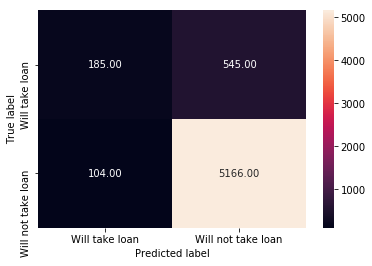

In [24]:
sns.heatmap(tree_cm, annot=True,  fmt='.2f', xticklabels = ["Will take loan", "Will not take loan"]
           , yticklabels = ["Will take loan", "Will not take loan"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [25]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()

export_graphviz( clf_tree,out_file = dot_data,feature_names = train_X.columns,
                class_names=["Will take loan", "Will not take loan"],
               filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png('loan_tree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.889755 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.889755 to fit



True

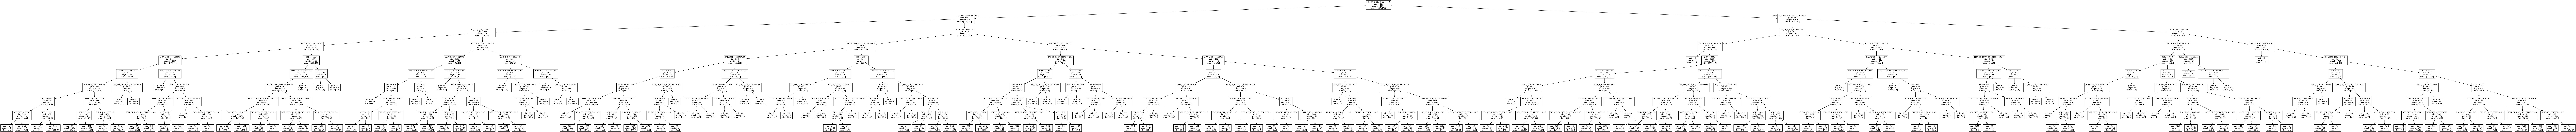

In [26]:
import pydotplus as pdot
export_graphviz( clf_tree,
              out_file = "chd_tree.odt",
              feature_names = train_X.columns )

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' )
chd_tree_graph.write_jpg( 'chd_tree.jpg' )
from IPython.display import Image
Image(filename='chd_tree.jpg')

In [27]:
print(dict(zip(train_X.columns, clf_tree.feature_importances_)))

{'BALANCE': 0.13219348348897145, 'SCR': 0.14399642810389235, 'HOLDING_PERIOD': 0.10145914237182954, 'LEN_OF_RLTN_IN_MNTH': 0.11293946617304886, 'FLG_HAS_CC': 0.02271922785135899, 'AMT_L_DR': 0.0994744969958318, 'AMT_MIN_BAL_NMC_CHGS': 0.004382387365719267, 'NO_OF_IW_CHQ_BNC_TXNS': 0.00535780452119097, 'FLG_HAS_NOMINEE': 0.007906574911047765, 'FLG_HAS_OLD_LOAN': 0.006628045455748525, 'AGE': 0.06960299088684291, 'NO_OF_L_CR_TXNS': 0.15538382954998034, 'NO_OF_L_DR_TXNS': 0.06414495512917402, 'OCCUPATION_SAL': 0.009168554658142623, 'OCCUPATION_SELF-EMP': 0.05143237161920147, 'OCCUPATION_SENP': 0.013210240918019023}


In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

train_y_prob = clf_tree.predict_proba(train_X)
fpr, tpr, thresholds = roc_curve(train_y,train_y_prob[:,1])
auc(fpr, tpr)

0.8493967107829169

In [29]:
test_y_prob = clf_tree.predict_proba(test_X)
fpr, tpr, thresholds = roc_curve(test_y, test_y_prob[:,1])
auc(fpr, tpr)

0.7717101193106495

In [30]:
(0.8707426523285638-0.7855679602817707)/0.8707426523285638

0.09781844477127276

In [31]:
#cross validation to overcome over fitting
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(clf_tree, train_X, train_y, cv = 10, scoring='roc_auc')
scores.mean()

D:\Anaconda_software\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.7637201552327723

In [32]:
scores.std()

0.02468608827854236

So by cross validation we get the correct AUC of the model, that is 0.7886 is the correct AUC with standard deviation of 0.0181. That we have to use this AUC as final statistics.

In [38]:
#improve AUC by Grid search Cross validation
from sklearn.grid_search import GridSearchCV

param_dist = {"criterion": ["gini","entropy"],"max_depth": np.arange(3,50),}
tree = DecisionTreeClassifier(min_samples_split = 100,min_samples_leaf = 10)
tree_cv = GridSearchCV(tree, param_dist, cv = 10,scoring = 'roc_auc')
tree_cv.fit(train_X,train_y)
classifier = tree_cv.best_estimator_
classifier.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=18,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
#checking rank ordering
train,test = train_test_split( loan_df, test_size = 0.3)

Prediction = classifier.predict_proba(train_X)
train["prob_score"] = Prediction[:,1]
train.head()

D:\Anaconda_software\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,FLG_HAS_CC,AMT_L_DR,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,AGE,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TARGET,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,prob_score
18253,528169.01,415,22,35,1,31273.0,0,0,1,1,53,14,3,0,0,0,1,0.028986
18279,32123.27,655,3,45,1,972960.0,0,0,1,0,43,5,4,0,1,0,0,0.317073
10454,317257.29,185,9,209,1,499521.0,0,0,1,1,39,11,9,0,0,0,0,0.750000
17776,3938.64,801,26,196,0,21300.0,0,0,1,0,32,7,3,0,0,1,0,0.189474
4199,47426.98,823,10,71,0,255630.0,0,0,1,1,54,5,4,0,0,0,0,0.000000


In [40]:
#decile code
def deciles(x):
    decile = pd.Series(index=[0,1,2,3,4,5,6,7,8,9])
    for i in np.arange(0.1,1.1,0.1):
        decile[int(i*10)]=x.quantile(i)
    def z(x):
        if x<decile[1]: return(1)
        elif x<decile[2]: return(2)
        elif x<decile[3]: return(3)
        elif x<decile[4]: return(4)
        elif x<decile[5]: return(5)
        elif x<decile[6]: return(6)
        elif x<decile[7]: return(7)
        elif x<decile[8]: return(8)
        elif x<decile[9]: return(9)
        elif x<=decile[10]: return(10)
        else:return(np.NaN)
    s=x.map(z)
    return(s)

In [41]:
def Rank_Ordering(X,y,Target):
    X['decile']=deciles(X[y])
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
    index=(["min_resp","max_resp","avg_resp",
        "cnt","cnt_resp","cnt_non_resp"])
    )).reset_index()
    Rank = Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"] = Rank["cnt_resp"]*100/Rank["cnt"]
    Rank["cum_resp"] = np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"] = np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"] = Rank["cum_resp"]/np.sum(Rank["cnt_resp"])
    Rank["cum_non_resp_pct"]=Rank["cum_non_resp"]/np.sum(Rank["cnt_non_resp"])
    Rank["KS"] = Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"]
    Rank
    return(Rank)

In [42]:
Rank = Rank_Ordering(train,"prob_score","TARGET")
Rank

D:\Anaconda_software\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,decile,min_resp,max_resp,avg_resp,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
5,10,0.400000,1.000000,0.527208,1415.0,177.0,1238.0,12.508834,177.0,1238.0,0.099944,0.101235,-0.001291
4,9,0.251969,0.383562,0.327696,1419.0,203.0,1216.0,14.305849,380.0,2454.0,0.214568,0.200671,0.013898
3,8,0.157143,0.250000,0.203497,1430.0,198.0,1232.0,13.846154,578.0,3686.0,0.326369,0.301415,0.024955
2,7,0.102273,0.155844,0.125749,1336.0,170.0,1166.0,12.724551,748.0,4852.0,0.422360,0.396762,0.025598
1,6,0.040541,0.100000,0.066384,1416.0,177.0,1239.0,12.500000,925.0,6091.0,0.522304,0.498078,0.024225
0,5,0.000000,0.036364,0.002577,6984.0,846.0,6138.0,12.113402,1771.0,12229.0,1.000000,1.000000,0.000000


In [44]:
Prediction_h = classifier.predict_proba(test_X)
test["prob_score"] = Prediction_h[:,1]
Rank_h = Rank_Ordering(test,"prob_score","TARGET")
Rank_h

D:\Anaconda_software\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,decile,min_resp,max_resp,avg_resp,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
5,10,0.383562,1.000000,0.518008,631.0,61.0,570.0,9.667195,61.0,570.0,0.082321,0.108386,-0.026064
4,9,0.246377,0.383333,0.316761,576.0,76.0,500.0,13.194444,137.0,1070.0,0.184885,0.203461,-0.018575
3,8,0.157143,0.245283,0.198685,621.0,77.0,544.0,12.399356,214.0,1614.0,0.288799,0.306902,-0.018104
2,7,0.102273,0.155844,0.125838,605.0,80.0,525.0,13.223140,294.0,2139.0,0.396761,0.406731,-0.009970
1,6,0.047619,0.100000,0.069110,570.0,64.0,506.0,11.228070,358.0,2645.0,0.483131,0.502947,-0.019816
0,5,0.000000,0.043478,0.003223,2997.0,383.0,2614.0,12.779446,741.0,5259.0,1.000000,1.000000,0.000000


## Overall Conclusion
a.	First node. If NO_L_DR_TRANSACTIONS<-5.5
i.	IF TRUE- FLAG_HAS_CC=0
1.	IF TRUE= nO_OF_L_CR TRANACTIONS<=16.5
a.	IF TRUE=HOLDING_PERIOD<=13.5
i.	IF TRUE=SCR<=177.5
1.	IF Amt_dr<=70K
a.	THEN wILL TAKE LOAN

### Please note, this is the most important part of analysis